In [2]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import warnings 
warnings.filterwarnings("ignore")

##### Blurring (detayı azaltır, gürültüyü engeller)

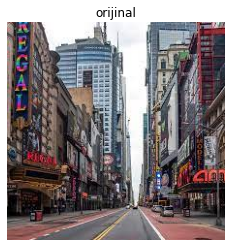

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'orijinal'),
 None)

In [3]:
img = cv2.imread("newy.jfif")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("orijinal"),plt.show()

# Ortalama (Mean) Bulanıklaştırma

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'Mean'))

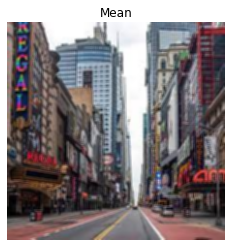

In [4]:
dst2 = cv2.blur(img,ksize=(3,3))
plt.figure(),plt.imshow(dst2),plt.axis("off"),plt.title("Mean")

# Gaussian Blur

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'Gaussian'))

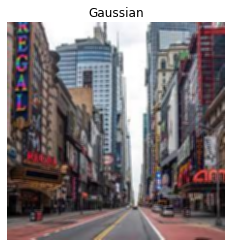

In [5]:
gb = cv2.GaussianBlur(img,ksize=(3,3),sigmaX=7)
plt.figure(),plt.imshow(gb),plt.axis("off"),plt.title("Gaussian")

# Medyan Blur

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'Medayn Blur'))

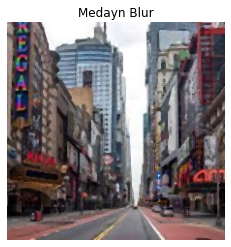

In [7]:
plt.figure(),plt.imshow(mb),plt.axis("off"),plt.title("Medayn Blur")


# Gürültülü Resim

In [18]:

def gaussianNoise(image):
    row,col,ch = image.shape
    mean = 0
    var = 0.05
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    
    return noisy


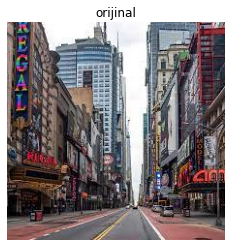

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'orijinal'),
 None)

In [19]:
img = cv2.imread("newy.jfif")

#RGB'leri 0 ile 1 arasında normalize etme
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)/255 
plt.figure(),plt.imshow(img),plt.axis("off"),plt.title("orijinal"),plt.show()

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


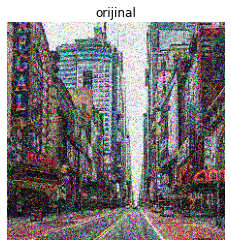

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'orijinal'),
 None)

In [20]:
gaussianNoisyImage = gaussianNoise(img)
plt.figure(),plt.imshow(gaussianNoisyImage),plt.axis("off"),plt.title("orijinal"),plt.show()

#### GAUSSIAN BLUR (AGAIN)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'with Gauss Blur'))

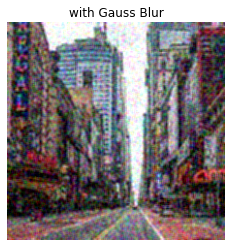

In [21]:
gb2 = cv2.GaussianBlur(gaussianNoisyImage,ksize=(3,3),sigmaX=7)
plt.figure(),plt.imshow(gb2),plt.axis("off"),plt.title("with Gauss Blur")

In [109]:
def saltPepperNoise(image):
    row,col,ch = image.shape
    s_vs_p = 0.5
    amount = 0.0004
    noisy = np.copy(image)
    
    #salt beyaz
    num_salt = np.ceil(amount * image.size * s_vs_p)
    coords = [np.random.randint(0,i-1,int(num_salt)) for i in image.shape]
    noisy[coords] = 1
    
    # pepper siyah
    num_pepper = np.ceil(amount * image.size * (1-s_vs_p))
    coords = [np.random.randint(0, i-1, int(num_pepper)) for i in image.shape]
    noisy[coords] = 0
    
    return noisy
    

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'S_vs_P Image'))

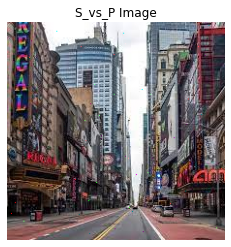

In [110]:
s_vs_pImage = saltPepperNoise(img)
plt.figure(),plt.imshow(s_vs_pImage),plt.axis("off"),plt.title("S_vs_P Image")

(<Figure size 432x288 with 1 Axes>,
 (-0.5, 224.5, 224.5, -0.5),
 Text(0.5, 1.0, 'with Medyan Blur'))

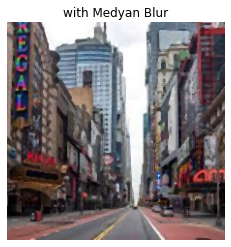

In [114]:
#cv2 float64 çalıştırmaz, s_vs_pimage'ı float32 çevirip değişken ata
mb2 = cv2.medianBlur(s_vs_pImage.astype(np.float32), ksize= 3)

plt.figure(),plt.imshow(mb2),plt.axis("off"),plt.title("with Medyan Blur")